In [1]:
import numpy as np
from bo_methods_lib.bo_methods_lib.GPBO_Classes_New import * #Fix this later
from bo_methods_lib.bo_methods_lib.GPBO_Class_fxns import * #Fix this later
from bo_methods_lib.bo_methods_lib.analyze_data import * #Fix this later
from bo_methods_lib.bo_methods_lib.GPBO_Classes_plotters import * #Fix this later
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
mpl.rcParams['figure.dpi'] = 200

2025-02-23 19:43:45.792858: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-23 19:43:45.792897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-23 19:43:45.794380: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-23 19:43:45.802372: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-23 19:43:47.003555: W tensorflow/compiler/tf2

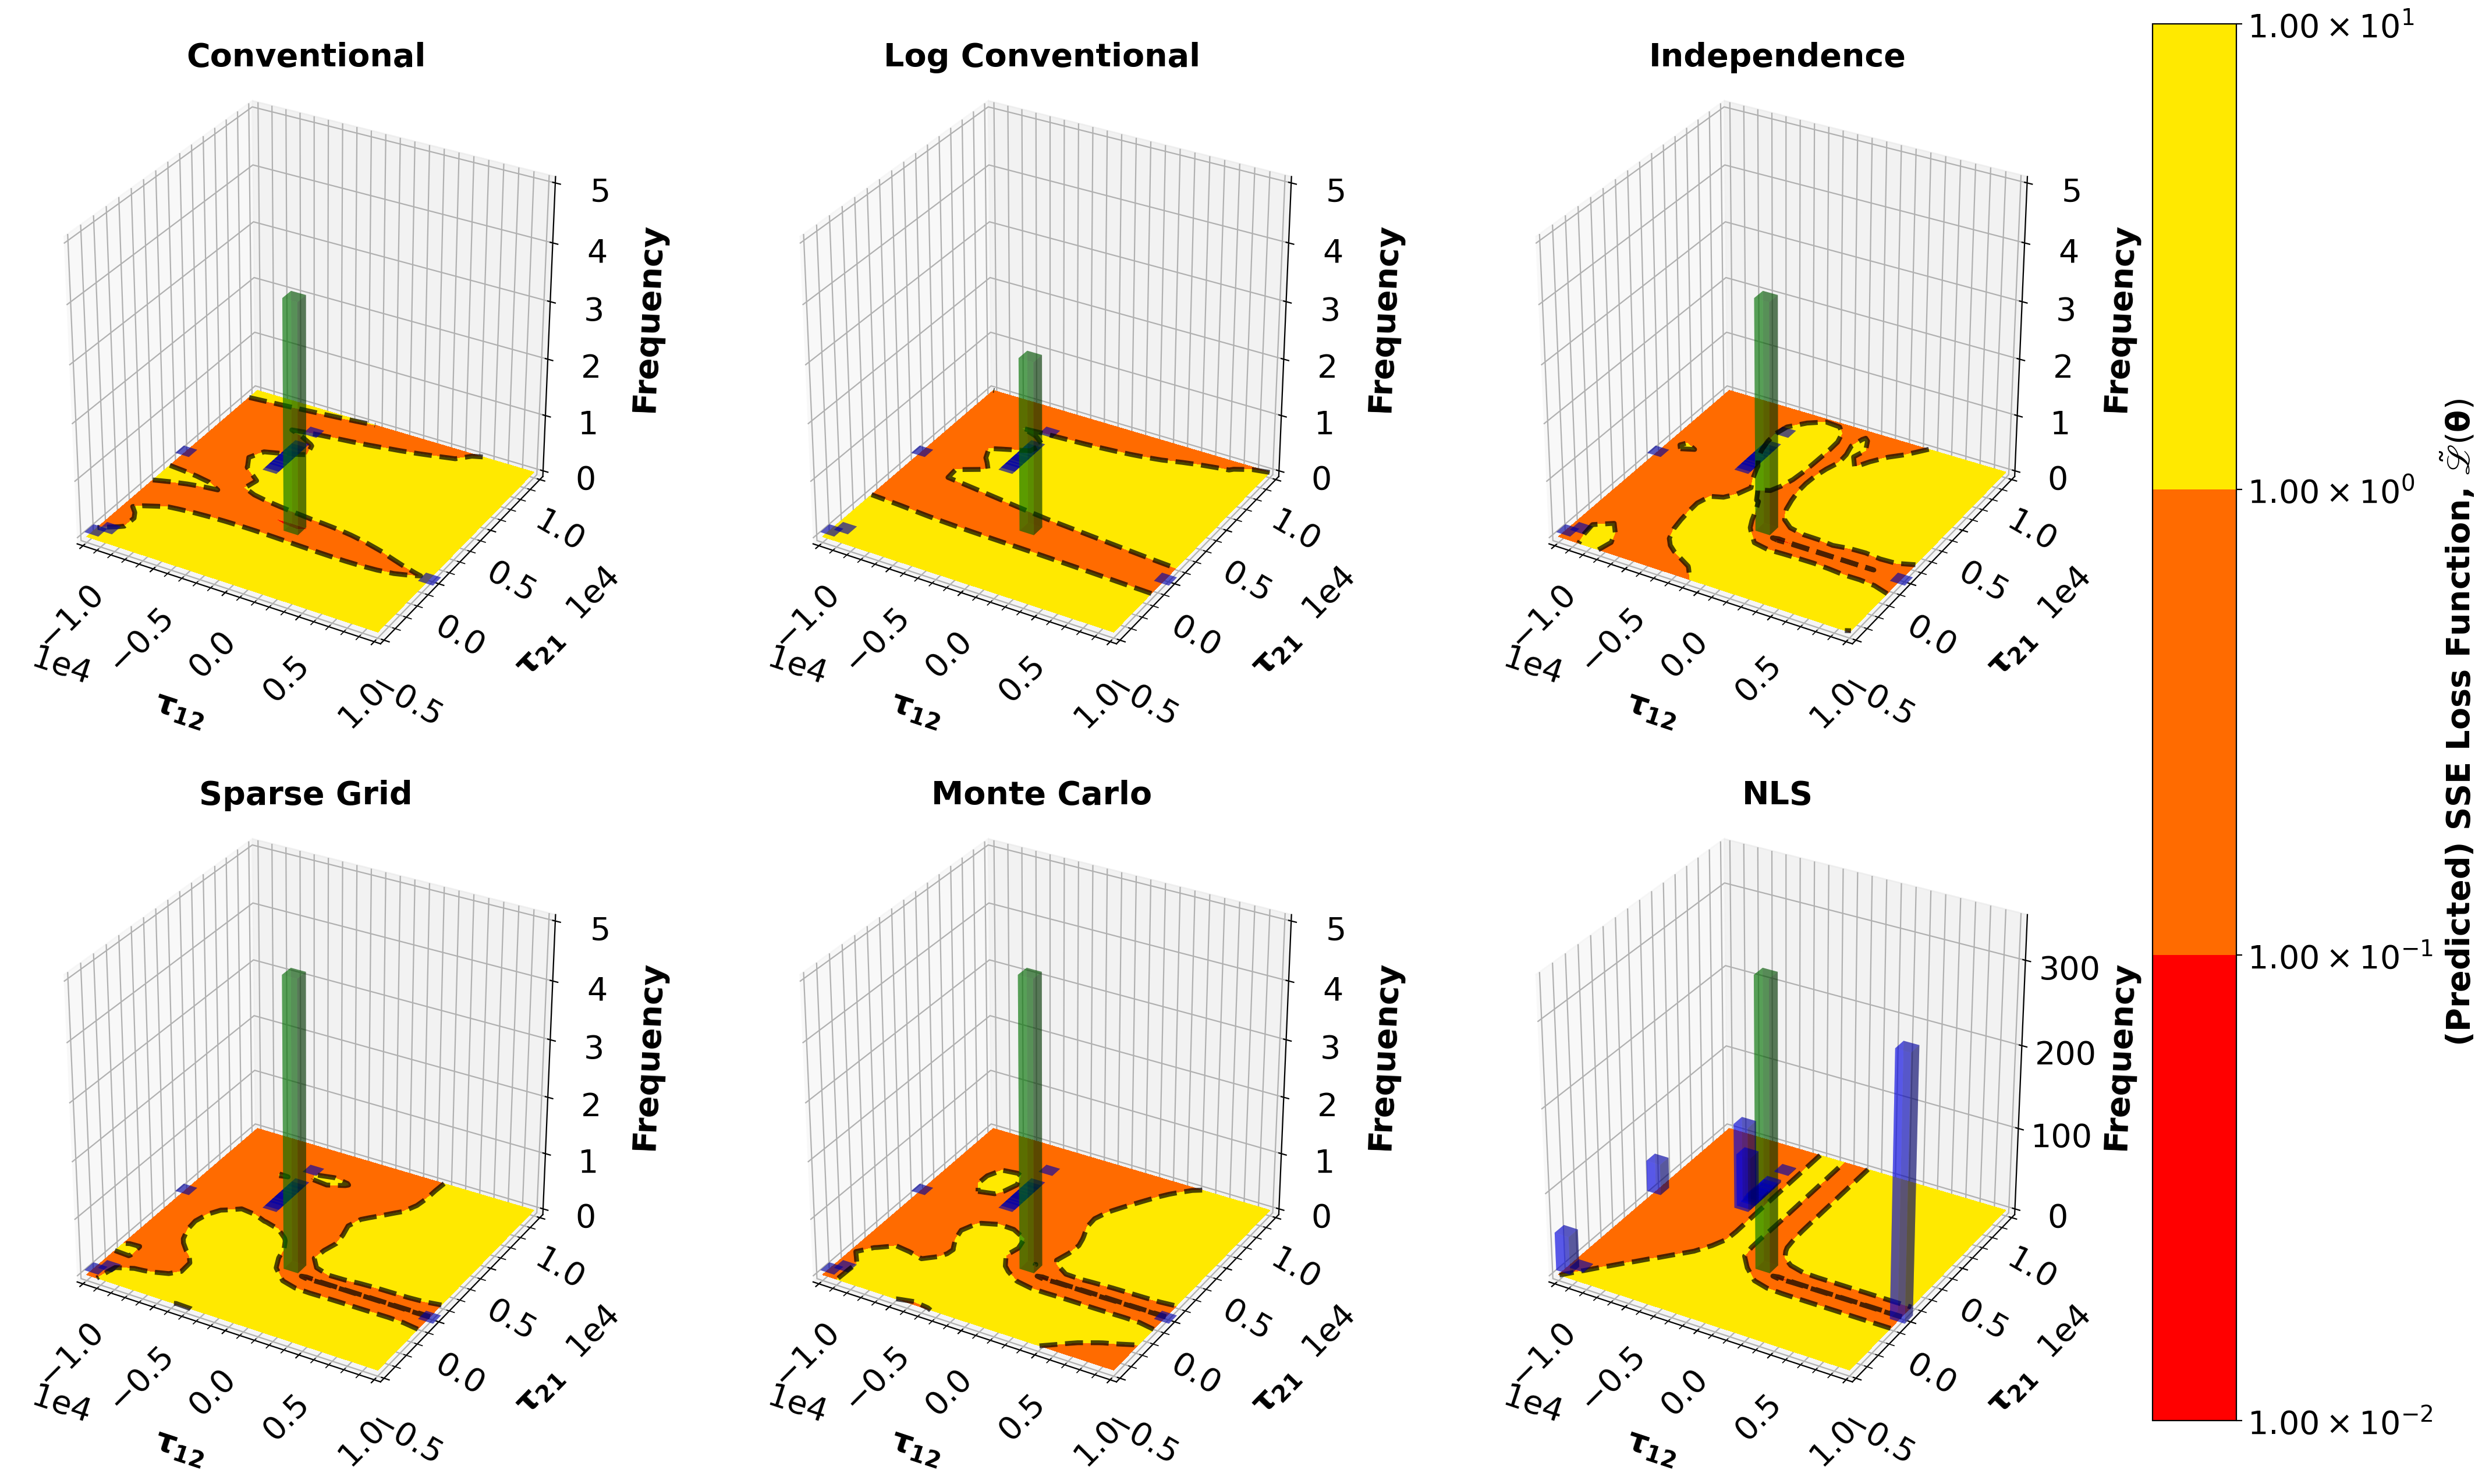

In [2]:
import numpy as np
import signac
from itertools import combinations
from bo_methods_lib.bo_methods_lib.analyze_data import General_Analysis
from bo_methods_lib.bo_methods_lib.GPBO_Classes_plotters import Plotters

# Ignore warnings
import warnings

warnings.simplefilter("ignore", category=RuntimeWarning)
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

meth_name_val_list = [1,2,3,5,6]
save_csv = False  # Set to False if you don't want to save/resave csvs
save_figs = False
modes = ["act"]
project = signac.get_project("GPBO_rand")
tot_runs_nls = 1000

for val in [17]:
    criteria_dict = {
        "cs_name_val": val,
        "ep_enum_val": 1,
        "gp_package": "gpflow",
        "meth_name_val": {"$in": meth_name_val_list},
    }

    for mode in modes:
        # analyzer = General_Analysis(criteria_dict, project, mode, save_csv)
        simulator = simulator_helper_test_fxns(val, 0, None, 1) #This is a dummy simulator object
        analyzer = LS_Analysis(criteria_dict, project, save_csv, simulator=simulator)
        plotters = Plotters(analyzer, save_figs)

        ###Get all data from experiments
        df_all_jobs, job_list, theta_true_data = analyzer.get_df_all_jobs(
            criteria_dict, save_csv
        )

        # Get Best Data from ep experiment
        ### Get Best Data from ep experiment
        df_best, job_list_best = analyzer.get_best_data()

        # Set z_choices and levels
        # z_choices = ["sse_sim", "sse_mean", "sse_var", "acq"]
        # levels = [100, 100, 100, 100]
        levels = 10

        # Loop over best jobs
        for i in range(len(job_list_best)):
            # Get jobs, runs, and iters to examine
            job = job_list_best[i]
            run_num = int(df_best["Run Number"].iloc[i])
            bo_iter = int(df_best["BO Iter"].iloc[i])

            # Back out number of parameters
            string_val = df_best["Theta Min Obj"].iloc[0]
            try:
                numbers = [
                    float(num)
                    for num in string_val.replace("[", "").replace("]", "").split()
                ]
            except:
                numbers = [float(num) for num in string_val]

            # Create list of parameter pair combinations
            dim_theta = len(np.array(numbers).reshape(-1, 1))
            dim_list = np.linspace(0, dim_theta - 1, dim_theta)
            pairs = len((list(combinations(dim_list, 2))))

            # Loop over parameter pairs
            if pairs < 3:
                for pair in range(pairs):
                    if i == 0:
                        plotters.plot_local_min_hms(pair, levels, tot_runs_nls)
                    # plotters.plot_hms_gp_compare(
                    #     job, run_num, bo_iter, pair, z_choices, levels
                    # )

In [ ]:
import signac
import os
from bo_methods_lib.bo_methods_lib.analyze_data import LS_Analysis
from bo_methods_lib.bo_methods_lib.GPBO_Class_fxns import simulator_helper_test_fxns

#Ignore warnings
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

#Set Stuff
meth_name_val_list = [1,2,3,4,5,6,7]
save_csv = False #Set to False if you don't want to save/resave csvs
save_figs = True
project = signac.get_project("GPBO_Fix")
seed = 1

for val in [15]:
    criteria_dict = {
        "cs_name_val": val,
        "ep_enum_val": 1,
        "gp_package": "gpflow",
        "meth_name_val": {"$in": meth_name_val_list},
    }

    analyzer = LS_Analysis(criteria_dict, project, save_csv)
    
    #Get Simulator Object
    simulator = simulator_helper_test_fxns(val, 0, None, 1) #This is a dummy simulator object
    #Get all least squares solutions
    tot_runs = 1000
    ls_analyzer = LS_Analysis(criteria_dict, project, save_csv, simulator=simulator)
    plotters = Plotters(ls_analyzer, save_figs)
    # local_mins = ls_analyzer.categ_min(tot_runs)
    hist_categ_min = plotters.hist_categ_min(tot_runs, True, True)
    # df = pd.read_csv("all_sets1.csv")
    # df["Theta Min Obj Cum."] = df["Theta Min Obj Cum."].to_numpy()

    # df = df.drop_duplicates(
    #     subset="Theta Min Obj Cum.", keep="first"
    # )
    # df = df[df["Optimality"] < 1e-4]
    # df["Theta Min Obj Cum."] = df["Theta Min Obj Cum."].apply(ls_analyzer.str_to_array_df_col)
    # # Drop minima with optimality > 1e-4
    
    # # Drop duplicate minima
    
    # print(len(df))
    # print(df["Theta Min Obj Cum."].head())

In [ ]:
df = pd.read_csv("/scratch365/mcarlozo/Toy_Problem/GPBO_Fix/Results_act/cs_name_val_in_11_14_2_15_17_12_13_3/meth_name_val_in_1_2_3_4_5_6_7/full_results.csv")
#Filter out the Min Obj Run for each Run, CS Name, and Method
result_df = df.loc[df.groupby(['BO Method', 'CS Name Val', 'Run Number'])['Min Obj Act Cum'].idxmin()]
for cs_name, group in result_df.groupby('CS Name Val'):
    if cs_name == 3:
        df_GPBO = group[~group['BO Method'].isin(['Conventional', 'Log Conventional'])]
        df_ls = pd.read_csv("GPBO_Fix/Results_act/cs_name_val_" + str(cs_name)+"/ls_local_min_1000.csv")
        df1 = np.vstack(df_GPBO["Theta Obj Act Cum"].apply(ls_analyzer.str_to_array_df_col).values)
        df2 = np.vstack(df_ls["Theta Min Obj Cum."].apply(ls_analyzer.str_to_array_df_col).values)

        print(df1.shape, df2.shape)

In [ ]:
print(df1)

In [ ]:
print(df2)

In [ ]:
# Assuming the arrays are already scaled (if not, scale them using MinMaxScaler as you did previously)
theta_bounds = ls_analyzer.simulator.bounds_theta_reg
scaler = MinMaxScaler()
scaler = MinMaxScaler()
scaler.fit([theta_bounds[0], theta_bounds[1]])
all_param_sets_GPBO = np.array(list(map(np.array, df_GPBO["Theta Obj Act Cum"].apply(ls_analyzer.str_to_array_df_col))))
all_param_sets_ls = np.array(list(map(np.array, df_ls["Theta Min Obj Cum."].apply(ls_analyzer.str_to_array_df_col))))
GPBO_scl = scaler.transform(all_param_sets_GPBO)
ls_scl = scaler.transform(all_param_sets_ls)
all_param_sets = np.vstack((GPBO_scl, ls_scl))
# Calculate the pairwise distances between df1 and df2
dist = pdist(all_param_sets)  # Stack the arrays for pairwise distance calculation
dist_sq = squareform(dist)  # Convert to a square distance matrix

# Tolerance threshold (adjust as necessary)
threshold = 0.01

 # Initialize an array to count occurrences of each unique set
minima_count = np.zeros(all_param_sets.shape[0], dtype=int)
#Initialize a boolean array to keep track of unique sets
unique_mask = np.ones(all_param_sets_GPBO.shape[0], dtype=bool)
print(len(unique_mask))
print(len(df1))
matches = 0
match_count_vector = np.zeros(len(ls_scl), dtype=int)

# Iterate over the upper triangle of the distance matrix
for row in GPBO_scl:
    # If the current set is already marked as non-unique, skip it
    distances = np.linalg.norm(ls_scl - row, axis=1)
    # Mark sets within the threshold distance as non-unique
    # If any distance is less than 0.1, consider it a match
    matched_indices = np.where(distances < 0.1)[0]    
    if matched_indices.size > 0:
        matches += 1
        unique_mask[matches] = True
        # Increment the count for each matching row in array_3x2
        for idx in matched_indices:
            match_count_vector[idx] += 1

# Filter out the unique sets from the pandas df
local_min_sets = df_GPBO[unique_mask]
# print(local_min_sets)

# Change tuples to arrays
local_min_sets = local_min_sets.copy()  # Ensure you're working with a copy
# local_min_sets["Num Occurrences"] = minima_count[unique_mask]
local_min_sets["Theta Obj Act Cum"] = local_min_sets["Theta Obj Act Cum"].apply(np.array)

# Put in order of lowest sse and reset index
local_min_sets = local_min_sets.sort_values(
    by=["Min Obj Act Cum"], ascending=True
)
local_min_sets = local_min_sets.reset_index(drop=True)

print(sum(match_count_vector)/len(GPBO_scl))
print("Matched rows (25x2 index, matched 3x2 indices):", match_count_vector)
print(local_min_sets["Theta Obj Act Cum"].shape())

In [ ]:
 #Scale values between 0 and 1 with minmax scaler
all_sets = df
theta_bounds = ls_analyzer.simulator.bounds_theta_reg
scaler = MinMaxScaler()
scaler = MinMaxScaler()
scaler.fit([theta_bounds[0], theta_bounds[1]])
all_param_sets = np.array(list(map(np.array, all_sets["Theta Min Obj Cum."].values)))
all_param_sets_scaled = scaler.transform(all_param_sets)
#Calculate the scaled euclidean distance between each pair of scaled points
dist = pdist(all_param_sets_scaled)/np.sqrt(all_param_sets.shape[1])
#Convert the condensed distance matrix to square form
dist_sq = squareform(dist)

# Initialize an array to count occurrences of each unique set
minima_count = np.zeros(all_param_sets.shape[0], dtype=int)
#Initialize a boolean array to keep track of unique sets
unique_mask = np.ones(all_param_sets.shape[0], dtype=bool)

# Iterate over the upper triangle of the distance matrix
for i in range(all_param_sets.shape[0]):
    # If the current set is already marked as non-unique, skip it
    if not unique_mask[i]:
        continue
    # Mark sets within the threshold distance as non-unique
    within_threshold = dist_sq[i] <= 0.01
    minima_count[i] += np.sum(within_threshold)
    unique_mask[within_threshold] = False
    unique_mask[i] = True  # Keep the current set


# Filter out the unique sets from the pandas df
local_min_sets = all_sets[unique_mask]
print(len(local_min_sets))
print(minima_count[unique_mask])

In [ ]:
# df_ls_best["Theta Min Obj Cum."] = np.array(list(map(np.array, df_ls_best["Theta Min Obj Cum."].values)))
# df_ls_best = local_min_sets
# theta_vals = np.vstack(local_min_sets['Theta Min Obj Cum.'].values)
# all_theta_vals = np.vstack(df["Theta Min Obj Cum."].values)
# unique_theta, theta_counts = np.unique(all_theta_vals, axis=0, return_counts=True)
# print(len(unique_theta))


In [ ]:
import numpy as np
import pandas as pd
import signac
import os
from itertools import combinations
import signac

import bo_methods_lib
from bo_methods_lib.bo_methods_lib.analyze_data import General_Analysis
from bo_methods_lib.bo_methods_lib.GPBO_Classes_plotters import Plotters

# Ignore warnings
import warnings

warnings.simplefilter("ignore", category=RuntimeWarning)
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)
# from sklearn.exceptions import InconsistentVersionWarning
# warnings.filterwarnings(action='ignore', category=InconsistentVersionWarning)

# Set Stuff
meth_name_val_list = [1, 2, 3, 4, 5, 6, 7]
save_csv = False  # Set to False if you don't want to save/resave csvs
save_figs = False
modes = ["act"]
project = signac.get_project("GPBO_Fix")

for val in [15,2,3,17]:
    criteria_dict = {
        "cs_name_val": val,
        "ep_enum_val": 1,
        "gp_package": "gpflow",
        "meth_name_val": {"$in": meth_name_val_list},
    }
    for mode in modes:
        analyzer = General_Analysis(criteria_dict, project, mode, save_csv)
        plotters = Plotters(analyzer, save_figs)

        ###Get all data from experiments
        df_all_jobs, job_list, theta_true_data = analyzer.get_df_all_jobs(
            criteria_dict, save_csv
        )
        ### Get Best Data from ep experiment
        df_best, job_list_best = analyzer.get_best_data()

        # Loop over z_choices to make comparison line plots
        z_choices = ["min_sse"]
        titles = [
            "Min SSE Parameter Values",
            "Min SSE Parameter Values Overall",
            "Optimal Acq Func Parameter Values",
        ]

        # Make Parity Plots
        # plotters.make_parity_plots()

        # Get best plots for all objectives with all 7 methods on each subplot
        plotters.plot_objs_all_methods(z_choices)

        # Get plot with each method on a different subplot for each obj
        for i in range(len(z_choices)):
            plotters.plot_one_obj_all_methods(z_choices[i])

        #Can optionally make plots for hyperparameters and theta values
        # for i in range(len(job_list_best)):
        #     #Plot hyperparameters
        #     plotters.plot_hypers(job_list_best[i])

        #     #Plot param values at min_sse, the best theta_values of min_sse overall, and param values at max ei
        #     for j in range(len(z_choices)):
        #         plotters.plot_thetas(job_list_best[i], z_choices[j], title = titles[j])


In [ ]:
import pandas as pd
pd.set_option('display.float_format', '{:.2e}'.format)
for i in [11,14,2,15,1,17,12,13,3,10]:
    filename_in = "/scratch365/mcarlozo/Toy_Problem/GPBO_Fix/Results_act/cs_name_val_" +str(i) +"/ep_enum_val_1/gp_package_gpflow/meth_name_val_in_1_2_3_4_5_6_7/ls_best_run.csv"
    df = pd.read_csv(filename_in)
    df["Run Time"] = df["Run Time"].apply(lambda x: x/60)
    row = df.loc[[0], ["Min Obj Act", "l2 norm", "Run Time", "Iter","Termination"]]
    print("CS: ", i)
    print(row)

In [ ]:
import signac
from bo_methods_lib.bo_methods_lib.analyze_data import All_CS_Analysis
from bo_methods_lib.bo_methods_lib.GPBO_Classes_plotters import All_CS_Plotter

#Ignore warnings
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

#Set parameters
meth_list = [1, 2, 3, 4, 5, 6, 7]
cs_list = [11,14,2,15,1,17,12,13,3,10]
save_csv = False #Set to False if you don't want to save/resave csvs
save_figs = False
bar_modes = ["time", "si_time"] #time and/or objs, si_time
project = signac.get_project("GPBO_Fix")

analyzer = All_CS_Analysis(cs_list, meth_list, project, "act", save_csv)
plotters = All_CS_Plotter(analyzer, save_figs)

#Get % true found
cs_list2 = [2,15,3,17] #[10,14] #[1,12,13,11] #[2,15,3,17]
#Change cs_list here to get averages over select case studies
vals = analyzer.get_percent_true_found(cs_list2)
#print min max, and median l2 norm
print(vals)
# vals.to_csv("percent_true_found.csv")
#Make Overall GPBO bar charts
# for bmode in bar_modes:
#     df_average = plotters.make_bar_charts(bmode)

#Make Derivative Free Bar Charts
# df_med_derivfree = plotters.make_derivfree_bar(s_meths = ["NLS", "SHGO-Sob", "NM", "GA"], ver = "med")

In [ ]:
import numpy as np
import pandas as pd
import signac
import os
from itertools import combinations
import signac

import bo_methods_lib
from bo_methods_lib.bo_methods_lib.analyze_data import General_Analysis, open_file_helper
from bo_methods_lib.bo_methods_lib.GPBO_Classes_plotters import Plotters

# Ignore warnings
import warnings

warnings.simplefilter("ignore", category=RuntimeWarning)
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)
# from sklearn.exceptions import InconsistentVersionWarning
# warnings.filterwarnings(action='ignore', category=InconsistentVersionWarning)

# Set Stuff
meth_name_val_list = [1]
save_csv = False  # Set to False if you don't want to save/resave csvs
save_figs = False
modes = ["act"] #, "gp", "acq"
project = signac.get_project("GPBO_RNG")
# project = signac.get_project("GPBO_Fix")

for val in [17]:
    criteria_dict = {
        "cs_name_val": val,
        "ep_enum_val": 1,
        "gp_package": "gpflow",
        "meth_name_val": {"$in": meth_name_val_list},
    }
    for mode in modes:
        analyzer = General_Analysis(criteria_dict, project, mode, save_csv)
        plotters = Plotters(analyzer, save_figs)

        ##Get all data from experiments
        df_all_jobs, job_list, theta_true_data = analyzer.get_df_all_jobs(
            criteria_dict, save_csv
        )
        # ### Get Best Data from ep experiment
        df_best, job_list_best = analyzer.get_best_data()

        # # Loop over z_choices to make comparison line plots
        z_choices = ["min_sse"]
        titles = [
            "Min SSE Parameter Values",
            "Min SSE Parameter Values Overall",
            "Optimal Acq Func Parameter Values",
        ]

        # Get best plots for all objectives with all 7 methods on each subplot
        # plotters.plot_objs_all_methods(z_choices)

        # # Get plot with each method on a different subplot for each obj
        for i in range(len(z_choices)):
            plotters.plot_one_obj_all_methods(z_choices[i])

        #Can optionally make plots for hyperparameters and theta values
        # for i in range(len(job_list_best)):
            #Plot hyperparameters
            # plotters.plot_hypers(job_list_best[i])

            #Plot param values at min_sse, the best theta_values of min_sse overall, and param values at max ei
            # for j in range(len(z_choices)):
            #     plotters.plot_thetas(job_list_best[i], z_choices[j], title = titles[j])

In [ ]:
import numpy as np
import pandas as pd
import signac
import os
from itertools import combinations
import signac

import bo_methods_lib
from bo_methods_lib.bo_methods_lib.analyze_data import General_Analysis
from bo_methods_lib.bo_methods_lib.GPBO_Classes_plotters import Plotters

# Ignore warnings
import warnings

warnings.simplefilter("ignore", category=RuntimeWarning)
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)
# from sklearn.exceptions import InconsistentVersionWarning
# warnings.filterwarnings(action='ignore', category=InconsistentVersionWarning)

# Set Stuff
meth_name_val_list = [2]
save_csv = False  # Set to False if you don't want to save/resave csvs
save_figs = False
modes = ["act"] #, "gp", "acq"
project = signac.get_project("GPBO_Fix")

for val in [10]:
    criteria_dict = {
        "cs_name_val": val,
        "ep_enum_val": 1,
        "gp_package": "gpflow",
        "meth_name_val": {"$in": meth_name_val_list},
    }
    for mode in modes:
        analyzer = General_Analysis(criteria_dict, project, mode, save_csv)
        plotters = Plotters(analyzer, save_figs)

        ###Get all data from experiments
        # df_all_jobs, job_list, theta_true_data = analyzer.get_df_all_jobs(
        #     criteria_dict, save_csv
        # )
        # ### Get Best Data from ep experiment
        # df_best, job_list_best = analyzer.get_best_data()

        #Load the training data from each job in criteria dict
        jobs = signac.get_project("GPBO_Fix").find_jobs(criteria_dict)
        print("Number of jobs: ", list(jobs)[0], list(jobs)[1])

        #Open the results file
        results = open_file_helper("GPBO_Fix/workspace/f577d8b53002f15c3e91c9a8acd7c2c8/BO_Results_GPs.gz")
        results2 = open_file_helper("GPBO_Fix/workspace/98641f0f92dbface9a35f2912eaa3d2a/BO_Results_GPs.gz")
        print(results[0].list_gp_emulator_class[0].gp_sim_data.y_vals)
        print(results2[0].list_gp_emulator_class[0].gp_sim_data.y_vals)

In [ ]:
# Define Simulator Class (Export your Simulator Object Here)
simulator = simulator_helper_test_fxns(1,0,0, 1)

# Generate Exp Data (OR Add your own experimental data as a Data class object)
set_seed = 1  # Set set_seed to 1 for data generation
gen_meth_x = Gen_meth_enum(2)
num_pts = 100
exp_data = simulator.gen_exp_data(num_pts, gen_meth_x, 1)

# Set simulator noise_std artifically as 5% of y_exp mean (So that noise will be set rather than trained)
simulator.noise_std = np.abs(np.mean(exp_data.y_vals)) * 0.05

In [ ]:
print(exp_data.y_vals)

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(exp_data.x_vals, exp_data.y_vals, color='blue', linestyle='-', linewidth=2)

# Add labels and title
ax.set_xlabel('X-Value')
ax.set_ylabel('Y-Value')
ax.set_title('BOD Curve Example')

# Add grid
ax.grid(True)

# Add legend
# ax.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample 2D data
X, Y = exp_data.x_vals.reshape(num_pts, num_pts,2).T
Z = exp_data.y_vals.reshape(X.shape)

# Create the plot
fig, ax = plt.subplots()

# Plot filled contours with contourf
contour_filled = ax.contourf(X, Y, Z, levels=20, cmap='jet')

# Add contour lines
contour_lines = ax.contour(X, Y, Z, levels=20, colors='black', linestyle = '--', linewidths=0.5)

# Add a colorbar for the filled contours
cbar = fig.colorbar(contour_filled, ax=ax)
cbar.set_label('Magnitude')

# Add labels to the contour lines
ax.clabel(contour_lines, inline=True, fontsize=8)

# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# Title
ax.set_title('Müller ' + r'$x_0$' ' Data')

# Show the plot
plt.show()
